In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
try:
    #plt.style.use('belle2')
    plt.style.use('belle2_serif')
    #plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

In [2]:
import os
from os import path
from yaml import safe_load


In [3]:
from hist.get_data import get_data
from hist.bkg_stack import generic_ntuple, get_data_in_module
from read_yaml_to_dict import read_yaml_to_dict


Welcome to JupyROOT 6.26/00
For optimal usage set `plt.style.use('belle2')`
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/jykim/workspace/DRAW/read_yaml_to_dict.py
/home/jykim/workspace/DRAW
{'Vegetables': ['Pepper', 'Tomato', 'Garlic']}


In [4]:
plot_variables = read_yaml_to_dict("plot_variables")
print(plot_variables)

{'vars': ['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal'], 'units': {'D0_M': 'M(D^0)', 'Dstarp_Q': 'D^{*+}_Q', 'D0_cosHel_0': '\\mathrm{cos}Hel_0', 'gamma_E': 'E_{\\gamma}', 'gamma_clusterSecondMoment': 'clusterSecondmoment(\\gamma)', '__ncandidates__': 'ncandidiates', '__experiment__': 'experiment', '__run__': 'run', '__event__': 'event', 'Dstarp_isSignal': 'True Dstar', 'D0_isSignal': 'True D0'}}


In [5]:
print(os.getcwd())

/home/jykim/workspace/DRAW


In [6]:
location='lab'
#locatoin='kekcc'
location='laptop'

In [7]:
sample_info = read_yaml_to_dict("samples")
print(sample_info)

{'pid_0_5': {'ccbar': '/ccbar/pid_0_5_ccbar_recon_output_0*.root', 'charged': '/charged/pid_0_5_charged_recon_output_0*.root', 'mixed': '/mixed/pid_0_5_mixed_recon_output_0*.root', 'uubar': '/uubar/pid_0_5_uubar_recon_output_0*.root', 'ddbar': '/ddbar/pid_0_5_ddbar_recon_output_0*.root', 'ssbar': '/ssbar/pid_0_5_ssbar_recon_output_0*.root', 'taupair': '/taupair/pid_0_5_taupair_recon_output_0*.root'}, 'location': {'kekcc': '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg', 'lab': '/home/jykim/nas/storage/01_recon/merge_generic_bkg', 'home': '', 'laptop': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg'}}


In [8]:
for i in sample_info['location']:
    if i == location:
        ccbar_sample = sample_info['location'][location] + sample_info['pid_0_5']['ccbar']
        charged_sample = sample_info['location'][location] + sample_info['pid_0_5']['charged']
        mixed_sample = sample_info['location'][location] + sample_info['pid_0_5']['mixed']
        uubar_sample = sample_info['location'][location] + sample_info['pid_0_5']['uubar']
        ddbar_sample = sample_info['location'][location] + sample_info['pid_0_5']['ddbar']
        ssbar_sample = sample_info['location'][location] + sample_info['pid_0_5']['ssbar']
        taupair_sample = sample_info['location'][location] + sample_info['pid_0_5']['taupair']
        
        sample_location={}
        sample_location["ccbar"]=ccbar_sample
        sample_location["charged"]=charged_sample
        sample_location["mixed"]=mixed_sample
        sample_location["uubar"]=uubar_sample
        sample_location["ddbar"]=ddbar_sample
        sample_location["ssbar"]=ssbar_sample
        sample_location["taupair"]=taupair_sample
        
print(sample_location)

{'ccbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root', 'charged': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/charged/pid_0_5_charged_recon_output_0*.root', 'mixed': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/mixed/pid_0_5_mixed_recon_output_0*.root', 'uubar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/uubar/pid_0_5_uubar_recon_output_0*.root', 'ddbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ddbar/pid_0_5_ddbar_recon_output_0*.root', 'ssbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ssbar/pid_0_5_ssbar_recon_output_0*.root', 'taupair': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/taupair/pid_0_5_taupair_recon_output_0*.root'}


In [10]:
pd_df = generic_ntuple(vector='phi', variables_dict=plot_variables,sample_location=sample_location)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Phi_InvM', 'D0_cosHel_0', 'Phi_InvM', 'D0_cosHel_0']


runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "D0_M" is not in a dataset and is not a custom column been defined.

(array([ 85., 113.,  88.,  86.,  83.,  93.,  93.,  95., 107., 104.,  81.,
         97.,  75.,  77.,  99.,  79.,  82.,  76.,  92.,  90.,  83.,  79.,
         80.,  68.,  80.,  74.,  79.,  85.,  76.,  68.,  76.,  70.,  85.,
         77.,  77.,  73.,  71.,  67.,  62.,  85.,  69.,  70.,  69.,  64.,
         78.,  59.,  72.,  60.,  69.,  72.,  70.,  68.,  66.,  53.,  67.,
         62.,  61.,  66.,  52.,  60.,  66.,  43.,  49.,  51.,  46.,  48.,
         49.,  53.,  42.,  50.,  45.,  54.,  60.,  35.,  50.,  52.,  45.,
         43.,  37.,  37.,  40.,  40.,  23.,  52.,  44.,  45.,  39.,  45.,
         34.,  45.,  40.,  46.,  39.,  33.,  43.,  34.,  33.,  33.,  31.,
         35.]),
 array([1.66504574, 1.66904329, 1.67304084, 1.6770384 , 1.68103595,
        1.6850335 , 1.68903105, 1.6930286 , 1.69702616, 1.70102371,
        1.70502126, 1.70901881, 1.71301637, 1.71701392, 1.72101147,
        1.72500902, 1.72900658, 1.73300413, 1.73700168, 1.74099923,
        1.74499679, 1.74899434, 1.75299189, 1.

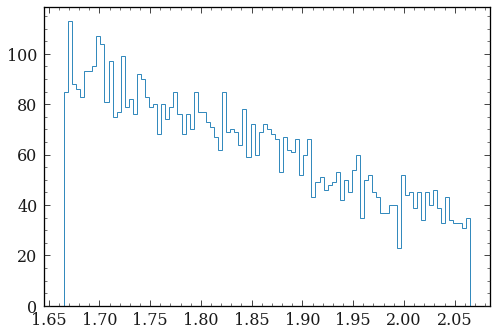

In [49]:
plt.hist(pd_df.D0_M , label=r'$\rho^0$ bkg',bins=100,  histtype='step') 

In [21]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
# file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_0*.root'
file = charged_sample
#file = '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_01.root'
tree = 'rho'
base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['D0_M']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
print(pd_df.describe())


             D0_M
count  494.000000
mean     1.843708
std      0.114045
min      1.665349
25%      1.743349
50%      1.837982
75%      1.933589
max      2.064288


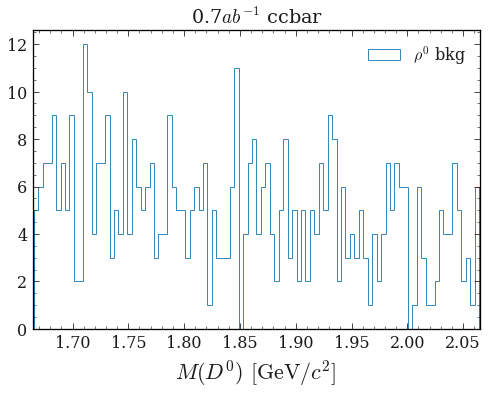

In [22]:
plt.hist(pd_df['D0_M'], label=r'$\rho^0$ bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  '0.7$ab^{-1}$ ccbar'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()